<a href="https://colab.research.google.com/github/ZKisielewska/learning-git-task/blob/master/8_2_Criminality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task: Crime**
1. Download the U.S. Police Fatal Interventions [database](https://uploads.kodilla.com/bootcamp/pro-data-visualization/files/fatal-police-shootings-data.csv) and then load it into a DataFrame.

2. Rearrange the table so that it compares both the number of victims of the intervention by race (**'race'**) and whether they showed signs of mental illness (**'signs_of_mental_illness'**).
3. Using **Map, Applymap or Apply**, add a column to this table indicating what percentage of the intervention victims showed signs of mental illness for each race. Answer which of them is characterized by the highest percentage of signs of mental illness during the intervention.
4. Add a column for the day of the week on which the intervention occurred. Count interventions by the corresponding day of the week. Then create a column chart so that the days of the week are ranked from Monday to Sunday.
5. Load data on the [population](https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population) of individual US states and data on state [abbreviations](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations) into the project. Combine these databases in such a way that you can count how many incidents in the database on fatal interventions occurred per 1000 inhabitants of each state.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1.** Download **the U.S. Police Fatal Interventions** database and then load it into a DataFrame.

In [3]:
df = pd.read_csv('https://uploads.kodilla.com/bootcamp/pro-data-visualization/files/fatal-police-shootings-data.csv', header=0)
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


**2.** Rearrange the table so that it compares both the number of victims of the intervention by race (**'race'**) and whether they showed signs of mental illness ('**signs_of_mental_illness**').

In [4]:
df_compare_nvictims = df.pivot_table(values='id', index='race', columns='signs_of_mental_illness', aggfunc='count')
df_compare_nvictims

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


**3.** Using **Map, Applymap or Apply**, add a column to this table indicating what **percentage** of the intervention victims showed signs of **mental illness for each race**. Answer which of them is characterized by the highest percentage of signs of mental illness during the intervention.

In [5]:
df_compare_nvictims['percentage'] = df_compare_nvictims[True] / df_compare_nvictims.apply(sum, axis=1) * 100
df_compare_nvictims

signs_of_mental_illness,False,True,percentage
race,,,
A,69,24,25.806452
B,1114,184,14.175655
H,745,157,17.405765
N,64,14,17.948718
O,37,11,22.916667
W,1763,713,28.796446


We can see that the highest percentage of signs of mental illness during the intervention shows the race **W**: White - not-Hispanic. This gives us almost 29% shot people showing signs of mental illness. However, we can also notice that the comparative group has the largest number of population, which translates into a percentage share of the total.

**4.** Add a column for the day of the week on which the intervention occurred. Count interventions by the corresponding day of the week. Then create a column chart so that the days of the week are ranked from Monday to Sunday.

In [6]:
df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

In [7]:
# Convert the date object type to datetime type to handle dates
# Add the column 'day_of_week' to df DataFrame
df['day_of_week'] = pd.to_datetime(df['date']).dt.day_name()
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


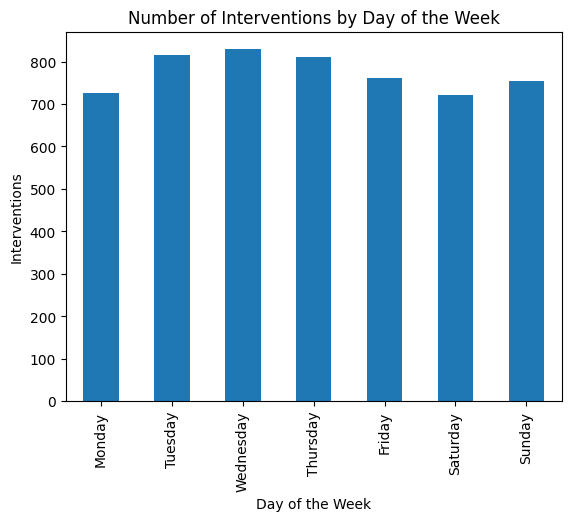

In [8]:
# Count interventions by the corresponding day of the week and column chart
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
number_of_inervention = df['day_of_week'].value_counts().reindex(weekdays)
number_of_inervention.plot(kind='bar')
df.head()

plt.xlabel('Day of the Week')
plt.ylabel('Interventions')
plt.title('Number of Interventions by Day of the Week')
plt.show()

**5.** Load appropriate database and count how many incidents in the database on fatal interventions occurred per 1000 inhabitants of each state.

In [9]:
# load population database
data_a = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
population = pd.DataFrame(data_a[0])
population.head()


,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1.0,1.0,California,39538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2.0,2.0,Texas,29145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3.0,4.0,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4.0,3.0,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5.0,6.0,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%


In [10]:
# display selected columns in population database
population = population.rename(columns={'State': 'state', 'Census population, April 1, 2020 [1][2]': 'population'})
population = population[['state', 'population']]
population.head()

,state,population
0,California,39538223
1,Texas,29145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700


In [11]:
population.dtypes

state         object
population     int64
dtype: object

In [12]:
# load abbreviations database
data_b = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations', header=2)
abbreviations = data_b[0]
abbreviations.head()

,ISO,"ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,ANSI,2-letter and 2-digit codes from the ANSI stand...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USPS,2-letter codes used by the United States Posta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USCG,2-letter codes used by the United States Coast...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abbreviations:,Abbreviations:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GPO,Older variable-length official US Government P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# display selected columns in abbreviations database
abbreviations = abbreviations.rename(columns={'ISO': 'state', 'Unnamed: 3': 'abbreviation'}).copy()
abbreviations = abbreviations[['state', 'abbreviation']]
abbreviations.head()

,state,abbreviation
0,ANSI,NaN
1,USPS,NaN
2,USCG,NaN
3,Abbreviations:,NaN
4,GPO,NaN


In [14]:
# load the U.S. Police Fatal Interventions database
df = pd.read_csv('https://uploads.kodilla.com/bootcamp/pro-data-visualization/files/fatal-police-shootings-data.csv', header=0)
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [15]:
# display selected columns in the fatal-police-shootings database
df_fatal = df
df_fatal = df_fatal.rename(columns={'id': 'number_of_deaths', 'state': 'abbreviation'})
df_fatal = df_fatal[['number_of_deaths', 'abbreviation']].copy()
df_fatal.head()

,number_of_deaths,abbreviation
0,3,WA
1,4,OR
2,5,KS
3,8,CA
4,9,CO


In [16]:
type(df_fatal)

pandas.core.frame.DataFrame

In [17]:
# merge population and abbreviations database on state
con_popul_abbrev = pd.DataFrame(pd.merge(population, abbreviations, on='state'))
con_popul_abbrev.head()

,state,population,abbreviation
0,California,39538223,CA
1,Texas,29145505,TX
2,Florida,21538187,FL
3,New York,20201249,NY
4,Pennsylvania,13002700,PA


In [18]:
type(con_popul_abbrev)

pandas.core.frame.DataFrame

In [19]:
# merge con_popul_abbrev and df_fatal dataframe on abbreviation
number_of_incidents = pd.DataFrame(pd.merge(con_popul_abbrev, df_fatal, how='inner', on='abbreviation'))
number_of_incidents.head()

,state,population,abbreviation,number_of_deaths
0,California,39538223,CA,8
1,California,39538223,CA,19
2,California,39538223,CA,43
3,California,39538223,CA,63
4,California,39538223,CA,68


In [20]:
type(number_of_incidents)

pandas.core.frame.DataFrame

In [27]:
# total mortality by state abbreviation per 1000
df_total = pd.DataFrame(df_fatal.groupby('abbreviation')['number_of_deaths'].sum())
df_total.head()


,number_of_deaths
abbreviation,
AK,129407
AL,300018
AR,295834
AZ,751621
CA,2236224


In [28]:
# merge con_popul_abbrev and df_fatal dataframe on abbreviation per 1000
number_of_incidents = pd.DataFrame(pd.merge(con_popul_abbrev, df_total, how='inner', on='abbreviation'))
number_of_incidents.head()

,state,population,abbreviation,number_of_deaths
0,California,39538223,CA,2236224
1,Texas,29145505,TX,1439452
2,Florida,21538187,FL,1103178
3,New York,20201249,NY,317601
4,Pennsylvania,13002700,PA,313924


We can see that **the highest mortality** during the fatal police interventions is in **California**. However, this state has also the **highest population**.

In [29]:
number_of_incidents['per_1000'] = (number_of_incidents['number_of_deaths']/number_of_incidents['population'])*1000
number_of_incidents.head()

,state,population,abbreviation,number_of_deaths,per_1000
0,California,39538223,CA,2236224,56.558536
1,Texas,29145505,TX,1439452,49.388473
2,Florida,21538187,FL,1103178,51.219631
3,New York,20201249,NY,317601,15.721850
4,Pennsylvania,13002700,PA,313924,24.142986
